# 크롤러 만들기

#### urllib 패키지

#### 네이버 크롤링

b'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\
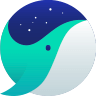
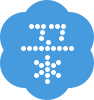

In [178]:
from urllib.request import urlopen

url="https://www.naver.com/"
html=urlopen(url)
print(html.read())

#### 뷰티풀솝 사용 방법

In [179]:
from bs4 import BeautifulSoup
html_str="<html><div>hello</div></html>"
bs_obj=bs4.BeautifulSoup(html_str,"html.parser")

print(type(bs_obj))
print(bs_obj)
print(bs_obj.fi(nd("div"))

# import한 후에 HTML형식의 문자열을 BeautifulSoup()에 넣어주면 .find()를
# 이용해 내가 필요한 부분만 뽑아낼 수 있다.

<class 'bs4.BeautifulSoup'>
<html><div>hello</div></html>
<div>hello</div>


In [180]:
html_str="""
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>    
"""
bs_obj=bs4.BeautifulSoup(html_str,"html.parser")

ul=bs_obj.find("ul")
print(ul)

<ul>
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>


In [183]:
html_str="""
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>    
"""
bs_obj=bs4.BeautifulSoup(html_str,"html.parser")

ul=bs_obj.find("ul")
li=ul.find("li")
print(li.text)

hello


In [ ]:
# findAll() 사용하기
# findAll()은 조건에 해당하는 모든 요소를 리스트[] 형태로 추출해주는 기능
# .find()는 만나는 첫 번째 태그를 리턴해주는 함수이지만, 
# .findAll()은 조건에 해당하는 모든 요소를 []로 리터해준다.

In [185]:
html_str="""
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>    
"""
bs_obj=bs4.BeautifulSoup(html_str,"html.parser")

ul=bs_obj.find("ul")
lis=ul.findAll("li")
print(lis)

[<li>hello</li>, <li>bye</li>, <li>welcome</li>]


##### 인덱스로 데이터 접근하기

In [188]:
html_str="""
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>    
"""
bs_obj=bs4.BeautifulSoup(html_str,"html.parser")

ul=bs_obj.find("ul")
lis=ul.findAll("li")
print(lis[0].text)

hello


##### 태그와 속성 그리고 속성값

* HTML은 <html>로 시작해서 </html>로 끝나는 문서.
* HTML은 태그(tag)와 속성(property)로 구성되어있음

태그는 <ul></ul> <li></li> <div></div> 등 <> 로 감싸져 있는 것을 태그라고 함
속성은 <ul class="greet"> 여기에서 class가 속성이다.
자주 사용하는 속성은 class, id, href, title 등이 있다

##### 데이터 뽑을때 class 속성 이해하기

In [192]:
html_str="""
<html>
    <body>
        <ul class="greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class="reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>    
    </body>
</html>    
"""
bs_obj=bs4.BeautifulSoup(html_str,"html.parser")

ul=bs_obj.find("ul",{"class":"reply"})
print(ul)

<ul class="reply">
<li>ok</li>
<li>no</li>
<li>sure</li>
</ul>


##### 속성값 뽑아내기

In [196]:

html_str="""
<html>
    <body>
        <ul class="ko">
            <li>
                <a href="https://www.naver.com/">네이버</a>
            </li>
            <li>
                <a href="https://www.daum.com/">다음</a>
            </li>
        </ul>
        <ul class="sns">
            <li>
                <a href="https://www.google.com/">구글</a>
            </li>
            <li>
                <a href="https://www.facebook.com/">페이스북</a>
            </li>
        </ul>
    </body>
</html>
"""
bs_obj=bs4.BeautifulSoup(html_str,"html.parser")

atag=bs_obj.find("a")
print(atag["href"])

https://www.naver.com/


#### 네이버에서 특정 글자 추출하기

##### urllib로 네이버 첫 페이지 데이터 받아오기


<!DOCTYPE doctype html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="tw
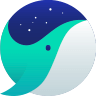
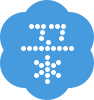

In [202]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error   import HTTPError
from urllib.error   import URLError

url="https://www.naver.com"
html=urllib.request.urlopen(url)
bs_obj=bs4.BeautifulSoup(html,"html.parser")
print(bs_obj)

In [203]:
top_right=bs_obj.find("div",{"class":"service_area"})
print(top_right)

<div class="service_area">
<a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>
<i class="sa_bar"></i>
<a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>
<a class="link_happybin" data-clk="top.happybean" href="https://happybean.naver.com"><i class="ico_happybin"></i><span class="blind">해피빈</span></a>
</div>


In [207]:
first_a=top_right.find("a")
print(first_a.text)

네이버를 시작페이지로


##### 네이버 메뉴이름 뽑아내기

In [212]:
ul=bs_obj.find("ul",{"class":"list_nav"})
ul

<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
</li>
</ul>

In [221]:
ul=bs_obj.find("ul",{"class":"list_nav"})

for li in ul:
    print(li)



<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>


<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>


<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>


<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>


<li class="nav_item"><a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a></li>


<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>


<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
</li>




In [224]:
lis=ul.findAll("li")

for li in lis:
    print(li)

<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
</li>


##### a 태그 뽑아내기

In [227]:
lis=ul.findAll("li")

for li in lis:
    a_tag=li.find("a")
    print(a_tag)
    
# a_tag라는 변수에 li태그에서 a를 뽑은 것을 넣으라는 명칭

<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
<a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a>
<a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a>
<a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a>
<a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a>
<a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a>
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>


#### Text 뽑아내기

In [229]:
lis=ul.findAll("li")

for li in lis:
    a_tag=li.find("a")
    print(a_tag.text)

메일
카페
블로그
지식iN
쇼핑
Pay
TV


### 다음 뉴스 제목 가져오기

##### 페이지 불러오기

In [260]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error   import HTTPError
from urllib.error   import URLError

In [267]:
url="https://news.daum.net/"
html=urlopen(url)
html
bs_obj=bs4.BeautifulSoup(html,"html.parser")
bs_obj


<!DOCTYPE html>

<html class="os_unknown none unknown version_0 " lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="always" name="referrer">
<meta content="Daum 뉴스" property="og:author"/>
<meta content="다음뉴스" property="og:site_name"/>
<meta content="홈" property="og:title"/>
<meta content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" property="og:image"/>
<meta content="다음뉴스" property="og:description"/>
<link href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico" rel="shortcut icon"/>
<title>홈 | 다음뉴스</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="//t1.daumcdn.net/media/kraken/news/73aec60/common.css.merged.css" rel="stylesheet" type="text/css">
<link href="//t1.daumcdn.net/media/kraken/news/73aec60/news.css.merged.css" rel="stylesheet" type="text/css"/>
<link href="//t1.daumcdn.net/media/kraken/news/73aec60/calendar.css.merged.css" rel="stylesheet" type="text/css"/>
<!--[if lte IE 8]>
<script src="https://m2.daumcdn.net/svc/or

##### 뉴스 제목 위치찾기

In [285]:
home=bs_obj.find("div",{"class":"feature_home"})
print(home)

<div class="feature_home">
<ul class="list_issue" data-tiara-layer="MCC">
<li data-tiara-layer="cluster1">
<div class="item_issue">
<a class="link_thumb" data-tiara-custom="contentUniqueKey=hamny-20200930222601083" data-tiara-id="20200930222601083" data-tiara-layer="article_thumb" data-tiara-ordnum="1" data-tiara-type="harmony" href="https://news.v.daum.net/v/20200930222601083">
<img '北에="" alt="靑 " class="thumb_g" src="https://img1.daumcdn.net/thumb/S254x156ht.u/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fnews%2F202009%2F30%2Fseoul%2F20200930222604737adwj.jpg&amp;scode=media" 공동조사="" 보도="" 사실="" 아냐""="" 전달'="" 통지문=""/>
</a>
<div class="cont_thumb">
<strong class="tit_thumb">
<a class="link_txt" data-tiara-custom="contentUniqueKey=hamny-20200930222601083" data-tiara-id="20200930222601083" data-tiara-layer="article_main" data-tiara-ordnum="1" data-tiara-type="harmony" href="https://news.v.daum.net/v/20200930222601083">靑 "'北에 공동조사 통지문 전달' 보도 사실 아냐"</a>
</strong>
<span class="info_thumb">서울신문</

In [280]:
top_right=bs_obj.find("div",{"class":""})
top_right

In [287]:
ul=top_right.find("ul",{"class":"list_issue"})
print(ul)

AttributeError: 'NoneType' object has no attribute 'find'

# 쇼핑몰 크롤링

In [102]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error   import HTTPError
from urllib.error   import URLError

#### 페이지 불러오기

In [125]:
headers = {'User-Agent': 'Mozilla/5.0'}
url="http://jolse.com/category/toners-mists/43/"
result=requests.get(url,headers=headers)

In [144]:
bs_obj=bs4.BeautifulSoup(result.content,"html.parser")

In [145]:
ul=bs_obj.find("ul",{"class":"prdList grid4"})
print(ul)

<ul class="prdList grid4">
<li class="item xans-record-" id="anchorBoxId_22569"><div class="box">
<span class="label-best">BEST</span>
<span class="label-new">NEW</span>
<div class="thumbnail">
<span class="chk"><input class="ProductCompareClass xECPCNO_22569 " type="checkbox"/></span>
<a df-data-rolloverimg1="//jolse.com/web/product/medium/201910/6357c3f7c1b34beae7eb402e865793eb.jpg" df-data-rolloverimg2="//jolse.com/web/product/tiny/201910/9fd79e693e44f4682bd6a8a24430cf0c.jpg" href="/product/detail.html?product_no=22569&amp;cate_no=43&amp;display_group=1" name="anchorBoxName_22569"><img alt="Isntree Hyaluronic Acid Toner 400ml (Renewal)" class="thumb" id="eListPrdImage22569_1" src="//jolse.com/web/product/medium/201910/6357c3f7c1b34beae7eb402e865793eb.jpg"/><!-- 일반목록꾸미기아이콘 --><!-- 검색목록꾸미기아이콘 --></a>
<div class="likeButton displaynone">
<button type="button"><strong class="displaynone"></strong></button>
<span class="bg-layer1"></span><span class="bg-layer2"></span><span class="bg-lay

In [146]:
boxes=ul.findAll("div":{"class":"box"})
for box in boxes:
    print(box)

SyntaxError: invalid syntax (<ipython-input-146-f82c731945d9>, line 1)

In [148]:
boxes=ul.findAll("div",{"class":"box"})

for box in boxes:
    ptag= box.find("p",{"class":"name"})
    print(ptag)
    # spans를 출력할때 [<span></span>,<span></span>] 형태로 출력이 된다
    # []안에 첫번쨰 span에는 Product이 들어있고 두번째 span에는 제품명이 들어있다    # []는 리스트 또는 배열이라고 한다.

<p class="name">
<a class="" href="/product/detail.html?product_no=22569&amp;cate_no=43&amp;display_group=1"><strong class="title displaynone">{</strong> <span style="font-size:14px;color:#555555;font-weight:bold;">Isntree Hyaluronic Acid Toner 400ml (Renewal)</span></a>
</p>
<p class="name">
<a class="" href="/product/detail.html?product_no=22561&amp;cate_no=43&amp;display_group=1"><strong class="title displaynone">{</strong> <span style="font-size:14px;color:#555555;font-weight:bold;">Isntree Hyaluronic Acid Toner Plus 200ml</span></a>
</p>
<p class="name">
<a class="" href="/product/detail.html?product_no=22560&amp;cate_no=43&amp;display_group=1"><strong class="title displaynone">{</strong> <span style="font-size:14px;color:#555555;font-weight:bold;">Isntree Hyaluronic Acid Toner 200ml (Renewal)</span></a>
</p>
<p class="name">
<a class="" href="/product/detail.html?product_no=18815&amp;cate_no=43&amp;display_group=1"><strong class="title displaynone">{</strong> <span style="font-si

In [162]:
boxes=ul.findAll("div",{"class":"box"})

for box in boxes:
    ptag= box.find("p",{"class":"name"})
    span=ptag.find("span")
    print(span)

<span style="font-size:14px;color:#555555;font-weight:bold;">Isntree Hyaluronic Acid Toner 400ml (Renewal)</span>
<span style="font-size:14px;color:#555555;font-weight:bold;">Isntree Hyaluronic Acid Toner Plus 200ml</span>
<span style="font-size:14px;color:#555555;font-weight:bold;">Isntree Hyaluronic Acid Toner 200ml (Renewal)</span>
<span style="font-size:14px;color:#555555;font-weight:bold;">innisfree Jeju Cherry Blossom Skin 200ml</span>
<span style="font-size:14px;color:#555555;font-weight:bold;">THE FACE SHOP Dr.Belmeur Advanced Cica Toner 150ml</span>
<span style="font-size:14px;color:#555555;font-weight:bold;">THE FACE SHOP Yehwadam Hwansaenggo Ultimate Rejuvenating Toner 160ml</span>
<span style="font-size:14px;color:#555555;font-weight:bold;">MISSHA Time Revolution Artemisia Treatment Essence 150ml</span>
<span style="font-size:14px;color:#555555;font-weight:bold;">iUNIK Tea Tree Relief Toner 200ml</span>
<span style="font-size:14px;color:#555555;font-weight:bold;">iUNIK Vita

##### 한번에 안뽑히는 경우 인덱스로 접근하기

In [169]:
headers = {'User-Agent': 'Mozilla/5.0'}
url="http://jolse.com/category/toners-mists/43/"
result=requests.get(url,headers=headers)

In [170]:
bs_obj=bs4.BeautifulSoup(result.content,"html.parser")

ul=bs_obj.find("ul",{"class":"prdList grid4"})
print(ul)

<ul class="prdList grid4">
<li class="item xans-record-" id="anchorBoxId_22569"><div class="box">
<span class="label-best">BEST</span>
<span class="label-new">NEW</span>
<div class="thumbnail">
<span class="chk"><input class="ProductCompareClass xECPCNO_22569 " type="checkbox"/></span>
<a df-data-rolloverimg1="//jolse.com/web/product/medium/201910/6357c3f7c1b34beae7eb402e865793eb.jpg" df-data-rolloverimg2="//jolse.com/web/product/tiny/201910/9fd79e693e44f4682bd6a8a24430cf0c.jpg" href="/product/detail.html?product_no=22569&amp;cate_no=43&amp;display_group=1" name="anchorBoxName_22569"><img alt="Isntree Hyaluronic Acid Toner 400ml (Renewal)" class="thumb" id="eListPrdImage22569_1" src="//jolse.com/web/product/medium/201910/6357c3f7c1b34beae7eb402e865793eb.jpg"/><!-- 일반목록꾸미기아이콘 --><!-- 검색목록꾸미기아이콘 --></a>
<div class="likeButton displaynone">
<button type="button"><strong class="displaynone"></strong></button>
<span class="bg-layer1"></span><span class="bg-layer2"></span><span class="bg-lay

In [174]:
boxes=ul.findAll("div",{"class":"box"})

for box in boxes:
    ptag=box.find("p",{"class":"name"})
    spans=ptag.findAll("span")
    print(spans)

[<span style="font-size:14px;color:#555555;font-weight:bold;">Isntree Hyaluronic Acid Toner 400ml (Renewal)</span>]
[<span style="font-size:14px;color:#555555;font-weight:bold;">Isntree Hyaluronic Acid Toner Plus 200ml</span>]
[<span style="font-size:14px;color:#555555;font-weight:bold;">Isntree Hyaluronic Acid Toner 200ml (Renewal)</span>]
[<span style="font-size:14px;color:#555555;font-weight:bold;">innisfree Jeju Cherry Blossom Skin 200ml</span>]
[<span style="font-size:14px;color:#555555;font-weight:bold;">THE FACE SHOP Dr.Belmeur Advanced Cica Toner 150ml</span>]
[<span style="font-size:14px;color:#555555;font-weight:bold;">THE FACE SHOP Yehwadam Hwansaenggo Ultimate Rejuvenating Toner 160ml</span>]
[<span style="font-size:14px;color:#555555;font-weight:bold;">MISSHA Time Revolution Artemisia Treatment Essence 150ml</span>]
[<span style="font-size:14px;color:#555555;font-weight:bold;">iUNIK Tea Tree Relief Toner 200ml</span>]
[<span style="font-size:14px;color:#555555;font-weight: